### Diamond Price prediction Competition
By

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score


In [4]:
train_set =pd.read_csv('L:\Python-data-ex\SHAI\datasets\diamond-price-prediction-train.csv')
train_set.drop(['Id'], axis=1, inplace=True) 
print(train_set)
print("train_set shape is: ", train_set.shape)

       carat        cut color clarity  depth  table  price     x     y     z
0       1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1       1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2       0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3       0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4       0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
43147   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18  3.18
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73  3.55
43149   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87  3.02
43150   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43  2.65
43151   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46  2.74

[43152 rows x 10 columns]
train_set shape is:  (43152, 10)


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [75]:
train_set.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [124]:
# train_set[train_set['x']==0]['x'].count()
# train_set[train_set['y']==0]['y'].count()
train_set[train_set['z']==0]['z'].count()

17

Checking the correlation

In [19]:
# train_set['volume'] = train_set['x'] *train_set['y'] *train_set['z']
# train_set

In [74]:
train_set.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


We find the attributes that have strong correlation with price below

In [76]:
train_set.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
depth   -0.013137
Name: price, dtype: float64

<Axes: >

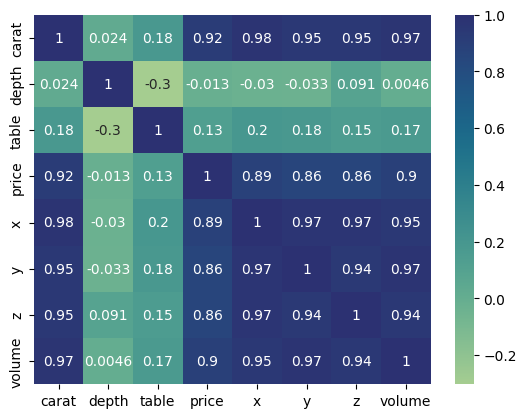

In [22]:
sns.heatmap(train_set.corr(), annot=True, cmap='crest')

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

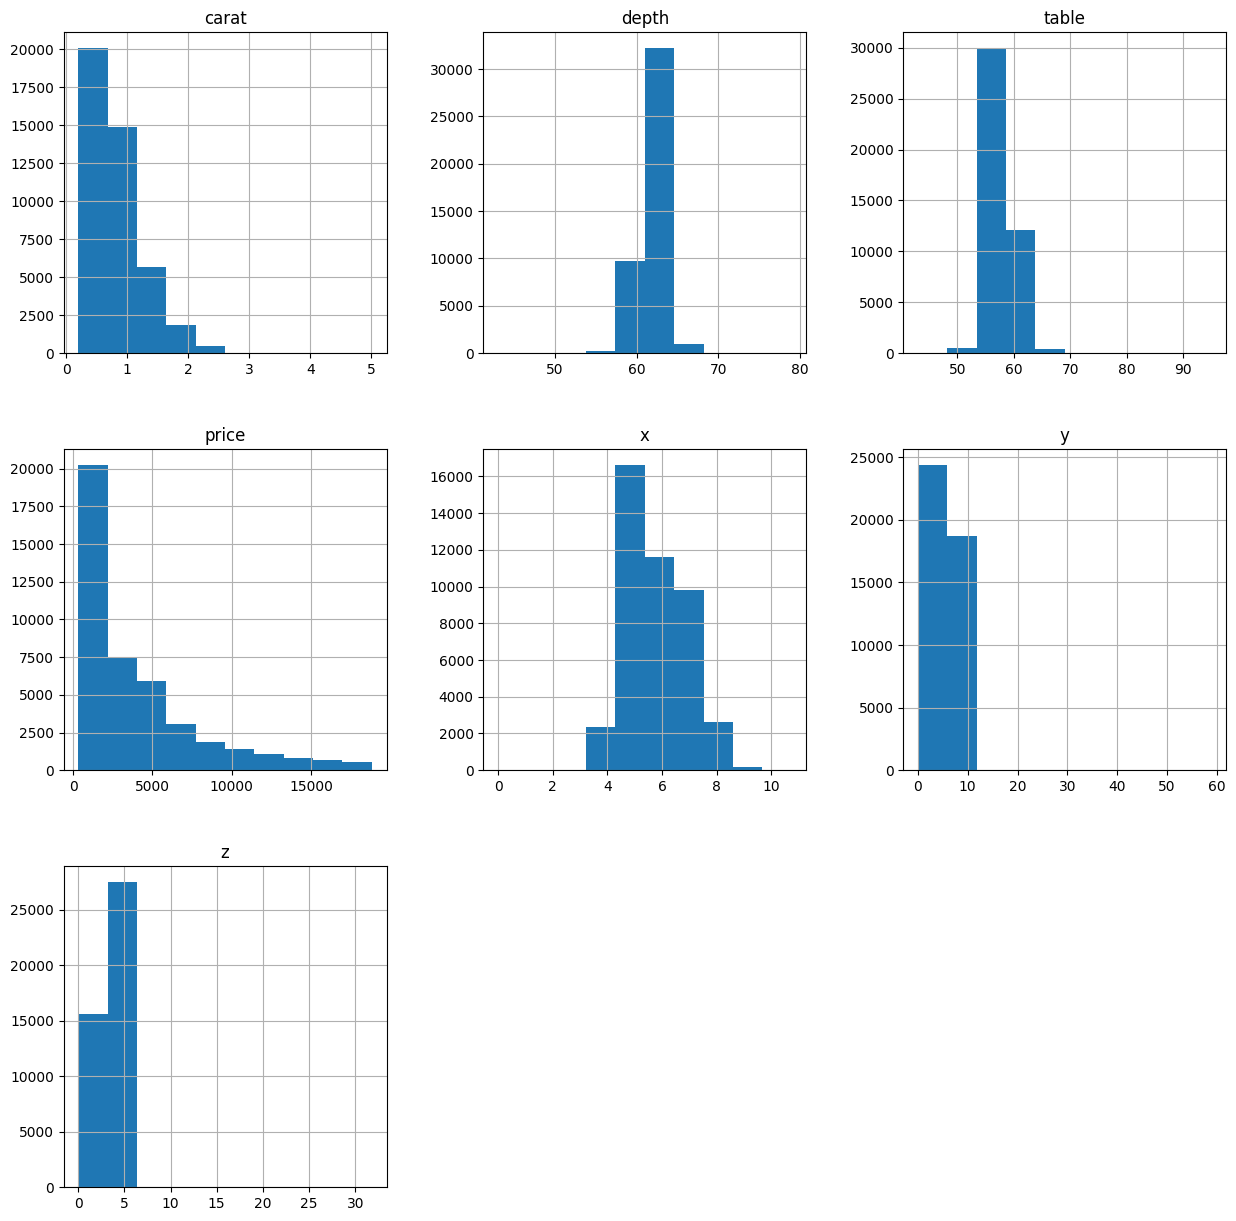

In [77]:
train_set.hist(figsize=(15,15))

<Axes: xlabel='price', ylabel='color'>

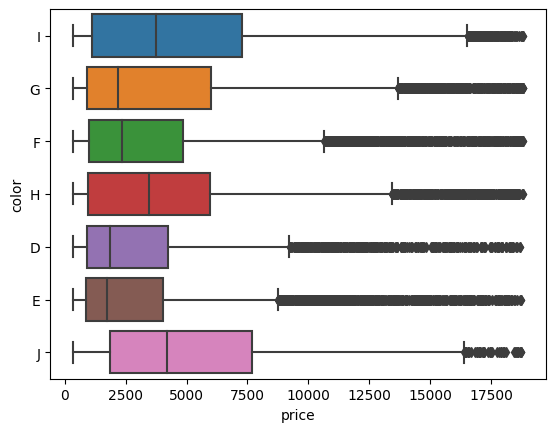

In [24]:
# train_set['price']
sns.boxplot(x=train_set['price'], y=train_set['color'])

#There are outliers as we can see

In [ ]:
for col in train_set.select_dtypes(include=[np.number]).columns: 
    if col == "price":
        continue
    
    ax = sns.lmplot(data=train_set, x='price', y=col) #implot looks better than scatterplot
    plt.title(f"Price Vs. {col}")
    plt.show()

We have to check if there are any missing values or zeros:

In [78]:
train_set.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [79]:
train_set.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Preprocessing

Splitting the data then handling columns with numerical and categorical data

In [2]:
# train_set
#Note to self: 
'''As with all estimators, it is important to fit the scalers to the training data only: never use fit() or fit_transform() for anything else 
than the training set. Once you have a trained scaler, you can then use it to transform() any other set, including the validation set, 
the test set, and new data. Note that while the training set values will always be scaled to the specified range, 
if new data contains outliers, these may end up scaled outside the range. If you want to avoid this, 
just set the clip hyperparameter to True.'''

'As with all estimators, it is important to fit the scalers to the training data only: never use fit() or fit_transform() for anything else \nthan the training set. Once you have a trained scaler, you can then use it to transform() any other set, including the validation set, \nthe test set, and new data. Note that while the training set values will always be scaled to the specified range, \nif new data contains outliers, these may end up scaled outside the range. If you want to avoid this, \njust set the clip hyperparameter to True.'

In [5]:
# train_split , test_split = train_test_split(train_set, test_size=0.2, random_state=42)
# train_set
X = train_set.drop(columns = 'price')
y = train_set['price']

X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# train_split_num = train_split.drop(['cut','color','clarity',"price"], axis=1) #Dropping categorical data
# test_split_num = test_split.drop(['cut','color','clarity',"price"], axis=1)

print('X_train shape is :',X_train.shape )
print('y_train shape is :',y_train.shape )
print('X_test shape is :',X_test.shape )
print('y_test shape is :',y_test.shape )

X_train shape is : (34521, 9)
y_train shape is : (34521,)
X_test shape is : (8631, 9)
y_test shape is : (8631,)


We create Pipelines for numerical and categorical attributes

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# from sklearn.compose import make_column_selector, make_column_transformer
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import PowerTransformer

# cat_pipeline = Pipeline(['cat_transformer', OneHotEncoder(sparse=False)])
# num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [7]:
num_attribs = ["carat", "depth", "table", "x", "y",'z']
cat_attribs = ["cut",'color','clarity']

# cat_pipeline = Pipeline(['cat_transformer', OneHotEncoder(handle_unknown="ignore",sparse=False)]) 

num_pipeline = Pipeline([('std_scaler', StandardScaler()),])  #to standardize the data

#or make_pipeline(StandardScaler())

# These transformers gave worse results ('Pwr-Trans', PowerTransformer(method="yeo-johnson"))
# [('Robust-Scaler', RobustScaler()),]

#ColumnTransformer([(name,operations,attributes)])
transformer= ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat",  OrdinalEncoder(), cat_attribs)])

# ("cat",  OneHotEncoder(sparse=False), cat_attribs)]) Ordinal encoder gives better results

transformed_columns_train = transformer.fit_transform(X_train,y_train)
transformed_columns_test = transformer.fit_transform(X_test,y_test)
transformed_columns_train

array([[ 1.58280818,  0.59130205,  0.68743802, ...,  3.        ,
         6.        ,  4.        ],
       [ 0.50964878,  0.31264198,  0.23918171, ...,  3.        ,
         3.        ,  0.        ],
       [ 0.88841092,  0.0339819 ,  0.23918171, ...,  3.        ,
         3.        ,  5.        ],
       ...,
       [-1.04748446,  0.66096707,  1.13569433, ...,  3.        ,
         0.        ,  2.        ],
       [ 1.47759647, -1.63797854,  1.13569433, ...,  2.        ,
         5.        ,  2.        ],
       [-0.81601871, -0.17501315, -0.20907461, ...,  2.        ,
         3.        ,  6.        ]])

In [22]:
#OR using make_column_transformer
# from sklearn.compose import make_column_transformer
# tc = make_column_transformer ((StandardScaler(),num_attribs),
#                               (OneHotEncoder(handle_unknown="ignore",sparse=False),cat_attribs ),
#                               )
# tc.fit_transform(X_train,y_train)

# Model evaluation
Using the below methods then measuring root mean squared error (rmse), the lower the rmse value is the better 

In [8]:
#Different methods that I will be using:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


linear_reg = LinearRegression()
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
rand_forest_reg = RandomForestRegressor(random_state=0)
knn_reg = KNeighborsRegressor()
xgb_reg = XGBRegressor()


model = [linear_reg,dec_tree_reg,rand_forest_reg,knn_reg,xgb_reg]

In [9]:
# def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
#     model.fit(X_t, y_t)
#     preds = model.predict(X_v)
#     return mean_absolute_error(y_v, preds)

# transformed_columns_train = transformer.fit_transform(X_train,y_train)
# transformed_columns_test = transformer.fit_transform(X_test,y_test)

for i in range(0, len(model)):
    model[i].fit(transformed_columns_train, y_train)
    preds = model[i].predict(transformed_columns_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    print("Model %d MSE: %d" % (i+1, mse))
    print('RMSE for',model[i],'is', rmse)

Model 1 MSE: 1699672
RMSE for LinearRegression() is 1303.7148563760343
Model 2 MSE: 929984
RMSE for DecisionTreeRegressor(random_state=0) is 964.3568474301896
Model 3 MSE: 475019
RMSE for RandomForestRegressor(random_state=0) is 689.2166525255504
Model 4 MSE: 559208
RMSE for KNeighborsRegressor() is 747.8021783931233
Model 5 MSE: 575178
RMSE for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n

Using Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(transformed_columns_train,y_train)
#.fit(features,target)

# linear_reg.fit(train_split_num_prepared,train_split_price)

LinearRegression()

In [10]:
# linear_pred = linear_reg.predict(train_split_num_prepared)

linear_pred = linear_reg.predict(transformed_columns_train)
linear_pred

array([9165.25789084, 4437.98944963, 7416.69493016, ...,  -55.87664043,
       8482.69017259, 1315.57954582])

In [11]:
from sklearn.metrics import mean_squared_error
linear_mse= mean_squared_error(y_train,linear_pred)
print('linear_mse is', linear_mse)
# mse = mean_squared_error(true, predicted)
linear_rmse = np.sqrt(linear_mse)
print('linear_rmse is', linear_rmse)

linear_mse is 1839246.390798467
linear_rmse is 1356.1881841390843


In [12]:
# -cross_val_score(estimator, features, target, scoring="neg_root_mean_squared_error", cv=10)
linear_reg_cross_val = -cross_val_score(linear_reg, transformed_columns_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
linear_reg_cross_val

array([1301.26120123, 1435.42581345, 1332.95404938, 1329.14267773,
       1377.92057619, 1393.78176881, 1412.66817014, 1375.43960597,
       1388.71755776, 1296.54877075])

In [13]:
pd.Series(linear_reg_cross_val).describe()

count      10.000000
mean     1364.386019
std        47.088587
min      1296.548771
25%      1330.095521
50%      1376.680091
75%      1392.515716
max      1435.425813
dtype: float64

Using Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(transformed_columns_train,y_train)
dec_tree_pred = dec_tree_reg.predict(transformed_columns_train)
dec_tree_pred

array([8749., 2801., 8362., ...,  709., 8555., 1123.])

In [92]:
dec_tree_mse= mean_squared_error(y_train,dec_tree_pred) 
print('dec_tree_mse is', dec_tree_mse)
dec_tree_rmse = np.sqrt(dec_tree_mse)
print('dec_tree_rmse is', dec_tree_rmse)

dec_tree_mse is 72.34086980871547
dec_tree_rmse is 8.505343603212951


In [93]:
dec_tree_cross_val = -cross_val_score(dec_tree_reg,transformed_columns, y_train, 
                                      scoring="neg_root_mean_squared_error", cv=10)
dec_tree_cross_val

array([733.80037704, 816.38138535, 798.88762403, 773.98825692,
       718.83249308, 713.31703333, 746.84644674, 786.5418782 ,
       811.60158191, 742.99471197])

In [94]:
pd.Series(dec_tree_cross_val).describe()

count     10.000000
mean     764.319179
std       38.137325
min      713.317033
25%      736.098961
50%      760.417352
75%      795.801188
max      816.381385
dtype: float64

Using Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)

random_forest_reg.fit(transformed_columns,y_train)

random_forest_pred= random_forest_reg.predict(transformed_columns)
random_forest_pred

array([8679.87, 2862.17, 8137.34, ...,  701.19, 8654.91, 1110.56])

In [96]:
random_forest_mse = mean_squared_error(y_train,random_forest_pred)
print("random_forest_mse is ", random_forest_mse)
random_forest_rmse = np.sqrt(random_forest_mse)
print("random_forest_rmse is ", random_forest_rmse)

random_forest_mse is  43843.49852711547
random_forest_rmse is  209.38839157679078


In [97]:
random_forest_reg_cross_val = -cross_val_score(random_forest_reg, transformed_columns, y_train, 
                                               scoring='neg_root_mean_squared_error', cv=10 )
random_forest_reg_cross_val

array([564.75586091, 551.72977993, 568.21867922, 566.85903165,
       549.01771734, 549.31853941, 572.95807523, 581.12801021,
       601.21216464, 533.38766876])

In [98]:
pd.Series(random_forest_reg_cross_val).describe()

count     10.000000
mean     563.858553
std       19.184458
min      533.387669
25%      549.921350
50%      565.807446
75%      571.773226
max      601.212165
dtype: float64

Using KNN (K-Nearest Neighbors) Regressor

In [208]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()

knn_reg.fit(transformed_columns,y_train)

knn_reg_pred= knn_reg.predict(transformed_columns)
knn_reg_pred

array([8312. , 2971.8, 7617. , ...,  676.6, 8467. , 1090. ])

In [209]:
knn_reg_mse = mean_squared_error(y_train,knn_reg_pred)
print("knn_reg_mse is ", knn_reg_mse)
knn_reg_rmse = np.sqrt(knn_reg_mse)
print("knn_reg_rmse is ", knn_reg_rmse)

knn_reg_mse is  384910.4561061383
knn_reg_rmse is  620.4115215775238


In [210]:
knn_reg_cross_val = -cross_val_score(knn_reg, transformed_columns, y_train, 
                                               scoring='neg_root_mean_squared_error', cv=10 )
knn_reg_cross_val

array([802.98170294, 814.03465496, 761.41463996, 819.99192444,
       789.18007618, 742.46663372, 799.08810901, 787.18497899,
       823.08494254, 763.10957699])

In [211]:
pd.Series(knn_reg_cross_val).describe()

count     10.000000
mean     790.253724
std       27.142634
min      742.466634
25%      769.128427
50%      794.134093
75%      811.271417
max      823.084943
dtype: float64

In [190]:
#Used for filling results
# linear_reg.fit(train_split_num_prepared,train_split_price)
# linear_pred = linear_reg.predict(train_split_num_prepared)
# cross_val_score(linear_reg, train_split_num_prepared, train_split_price,

Using XGBoost (eXtreme Gradient Boosting) Regressor

In [238]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(transformed_columns,y_train)

xgb_reg_pred = xgb_reg.predict(transformed_columns)
xgb_reg_pred

array([8380.902  , 2704.821  , 7705.0493 , ...,  684.77405, 8683.777  ,
       1168.9418 ], dtype=float32)

In [239]:
xgb_reg_mse = mean_squared_error(y_train,xgb_reg_pred)
print("xgb_reg_mse is ", xgb_reg_mse)
xgb_reg_rmse = np.sqrt(xgb_reg_mse)
print("xgb_reg_rmse is ", xgb_reg_rmse)

xgb_reg_mse is  132263.91868348708
xgb_reg_rmse is  363.6810672601573


In [240]:
xgb_reg_cross_val = -cross_val_score(xgb_reg, transformed_columns, y_train, 
                                   scoring='neg_root_mean_squared_error', cv=10 )
xgb_reg_cross_val

array([538.65758554, 540.88164534, 549.75785468, 582.59459886,
       548.10428361, 545.04502231, 585.6143517 , 585.82894245,
       592.96518248, 523.307096  ])

In [241]:
pd.Series(xgb_reg_cross_val).describe()

count     10.000000
mean     559.275656
std       24.838684
min      523.307096
25%      541.922490
50%      548.931069
75%      584.859413
max      592.965182
dtype: float64

In [203]:
#Since XBG returned the lowest RMSE value I had to find the best parameters for it
#Results below

'''max_depth = [0, 5, 10, 15]
min_child_weight = [1, 2, 3, 4, 5]
learning_rate = [0.05, 0.1, 0.15, 0.2]
n_estimators = [25,50, 100]

param_grid= {
 'max_depth': max_depth,
 'min_child_weight': min_child_weight,
 'learning_rate': learning_rate,
 'n_estimators': n_estimators
}
grid_model= GridSearchCV(estimator= xgb_reg, param_grid= param_grid, scoring= "neg_root_mean_squared_error")

grid_model.fit(transformed_columns,y_train)
grid_model.best_params_'''

# This is the Output
# {'learning_rate': 0.1,
#  'max_depth': 10,
#  'min_child_weight': 3,
#  'n_estimators': 100}

'max_depth = [0, 5, 10, 15]\nmin_child_weight = [1, 2, 3, 4, 5]\nlearning_rate = [0.05, 0.1, 0.15, 0.2]\nn_estimators = [25,50, 100]\n\nparam_grid= {\n \'max_depth\': max_depth,\n \'min_child_weight\': min_child_weight,\n \'learning_rate\': learning_rate,\n \'n_estimators\': n_estimators\n}\ngrid_model= GridSearchCV(estimator= xgb_reg, param_grid= param_grid, scoring= "neg_root_mean_squared_error")\n\ngrid_model.fit(transformed_columns,y_train)\ngrid_model.best_params_'

Ignore this, it was used to make work easier

In [64]:
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()
# linear_reg.fit(transformed_columns,y_train)
# linear_pred = linear_reg.predict(transformed_columns)
# #.fit(features,target)
# linear_mse= mean_squared_error(y_train,linear_pred)
# -cross_val_score(linear_reg, transformed_columns, y_train

# Applying model to test.csv

In [245]:
test_set =pd.read_csv('file_location')
# test_set.drop(['cut','color','clarity'],axis=1,inplace=True)
print('test_set shape is',test_set.shape)
# test_set['volume'] = test_set['x'] *test_set['y'] *test_set['z']
Id=test_set['Id']

transformed_columns_test = transformer.transform(test_set)
transformed_columns_test

#Use transformed_columns_test = transformer.transform(test_set) instead of .fit_transform() to improve the score
#Using transform applies what was learnt from the dataset before intead of learning it again

test_set shape is (10788, 10)


array([[-0.96342224, -0.46321052, -0.20230891, ...,  2.        ,
         3.        ,  7.        ],
       [-0.18558493,  0.66259865,  0.24475238, ...,  3.        ,
         1.        ,  5.        ],
       [-0.75319594,  0.73296173, -0.64937019, ...,  4.        ,
         5.        ,  4.        ],
       ...,
       [-0.18558493,  0.38114636, -1.09643147, ...,  2.        ,
         1.        ,  6.        ],
       [ 0.65532028, -0.5335736 ,  1.13887494, ...,  3.        ,
         1.        ,  3.        ],
       [ 2.52633435, -0.18175823,  0.69181366, ...,  3.        ,
         2.        ,  3.        ]])

In [247]:
# {'learning_rate': 0.1,
#  'max_depth': 10,
#  'min_child_weight': 3,
#  'n_estimators': 100}

xgb_reg = XGBRegressor(learning_rate=0.1,max_depth=10,min_child_weight=3,n_estimators=100)

xgb_reg.fit(transformed_columns,y_train)
# print('transformed_columns shape is',transformed_columns.shape)

pred =xgb_reg.predict(transformed_columns_test)
pred
# .drop('Id',axis=1)

array([  938.4242,  2886.9717,   821.1859, ...,  4440.051 ,  4698.4365,
       13935.994 ], dtype=float32)

In [244]:
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)
print(sub)

          Id         price
0          1    938.424194
1          2   2886.971680
2          3    821.185913
3          4   2847.711426
4          5   1112.746948
...      ...           ...
10783  10784   1714.443115
10784  10785   6625.739746
10785  10786   4440.050781
10786  10787   4698.436523
10787  10788  13935.994141

[10788 rows x 2 columns]


In [230]:
#Used to save the data
# sub.to_csv('name',index=False)